In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

#from scipy.stats import logistic, norm
#from scipy.stats import multivariate_normal as Gaussian

from numpy.random import multivariate_normal as Gaussian
from numpy.random import normal as norm

import time

In [3]:
'''
This file contains sample code about how to use Gauss–Hermite quadrature to compute a 
specific type of integral numerically.

The general form of this type of integral is:( see https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature 
for more details)

F = int_{ -inf}^{+inf} e^{-x*x) f(x) dx,  (1)

in which we're calculating the integral of f(x) in the range ( -inf, +inf) weighted by e^(-x*x ).
Note that for f(x) being polynomial function, this integral is guaranteed to converge. But for some others 
convergence is not guaranteed.
'''

def gass_hermite_quad(f, degree):
    '''
    Calculate the integral (1) numerically.
    :param f: target function, takes a array as input x = [x0, x1,...,xn], and return a array of function 
    values f(x) = [f(x0),f(x1), ..., f(xn)]
    :param degree: integer, >=1, number of points
    :return:
    '''

    points, weights = np.polynomial.hermite.hermgauss(degree)

    #function values at given points
    f_x = f(points)

    #weighted sum of function values
    F = np.sum(f_x  * weights)

    return F

In [63]:
sigma = lambda x: logistic.cdf(a*x+b)
sigma_ = lambda x: 1/np.sqrt(alpha)*logistic.cdf(a*x/np.sqrt(alpha)+b)

In [64]:
alpha = 1
a = 10 
b = 3

In [65]:
G = gass_hermite_quad(sigma_, degree=300)
G

1.1689795217645669

In [66]:
lp = lambda x: -alpha*x*x + np.log(sigma(x))

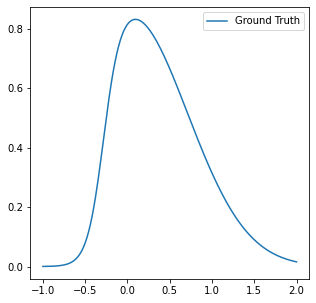

In [67]:
X = np.linspace(-1, 2, 300)
plt.figure(figsize=(5, 5))
plt.plot(X, 1/G *np.exp(lp(X)), label = 'Ground Truth')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
sigma(np.array([1,-9]))

array([9.99997740e-01, 1.64581143e-38])

### (a) MCMC

In [8]:
d = 1

In [9]:
def log_gaussian(z, mu, C):
    return -0.5 * (z - mu).reshape(1,-1) @ np.linalg.inv(C) @ (z - mu)

In [10]:
def TK(z, C):
    z_new = Gaussian(mean = z, cov = C)
    log_acc = lp(z_new) - lp(z)
    log_p = np.log(np.random.uniform())
    if log_p <= log_acc:
        return z_new
    else:
        return None

In [11]:
def _rvs_(tau = 0.01, n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    c = 1
    sampled = 0
    z_given = np.zeros(1)
    Sample_points = []
    iteration = 0
    while sampled < n_sample:
        if iteration % 10000 == 0:
            print('iteration = {}, number of accepted points = {}'.format(iteration,c))
        iteration += 1
        z_ = TK(z_given, tau*np.eye(d))
        if z_ is not None:
            c += 1
            z_given = z_
            if c == burn_in_after:
                print('burn_in!!')
            if c >= burn_in_after:
                if sampled % pick_every == 0:
                    Sample_points.append(z_given)
                sampled += 1
    return np.array(Sample_points), c/iteration

In [12]:
t = time.time()
S, p = _rvs_()
print(time.time()-t)

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 9382
iteration = 20000, number of accepted points = 18701
iteration = 30000, number of accepted points = 27987
iteration = 40000, number of accepted points = 37332
iteration = 50000, number of accepted points = 46656
iteration = 60000, number of accepted points = 55951
iteration = 70000, number of accepted points = 65338
iteration = 80000, number of accepted points = 74655
iteration = 90000, number of accepted points = 84005
iteration = 100000, number of accepted points = 93322
burn_in!!
iteration = 110000, number of accepted points = 102634
iteration = 120000, number of accepted points = 111969
iteration = 130000, number of accepted points = 121285
iteration = 140000, number of accepted points = 130672
iteration = 150000, number of accepted points = 139942
iteration = 160000, number of accepted points = 149303
24.549095153808594


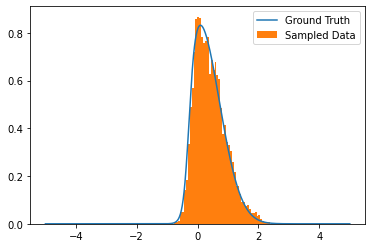

In [13]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(lp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled Data")
plt.grid(True)
plt.legend()
plt.show()

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 9334
iteration = 20000, number of accepted points = 18608
iteration = 30000, number of accepted points = 28020
iteration = 40000, number of accepted points = 37405
iteration = 50000, number of accepted points = 46815
iteration = 60000, number of accepted points = 56152
iteration = 70000, number of accepted points = 65474
iteration = 80000, number of accepted points = 74768
iteration = 90000, number of accepted points = 84093
iteration = 100000, number of accepted points = 93386
burn_in!!
iteration = 110000, number of accepted points = 102706
iteration = 120000, number of accepted points = 112031
iteration = 130000, number of accepted points = 121360
iteration = 140000, number of accepted points = 130688
iteration = 150000, number of accepted points = 140043
iteration = 160000, number of accepted points = 149335


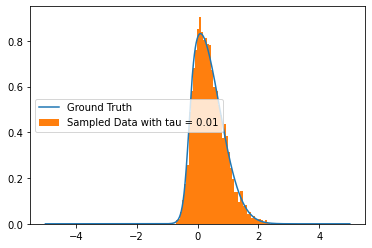

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 7987
iteration = 20000, number of accepted points = 15960
iteration = 30000, number of accepted points = 23912
iteration = 40000, number of accepted points = 31996
iteration = 50000, number of accepted points = 40003
iteration = 60000, number of accepted points = 47968
iteration = 70000, number of accepted points = 55960
iteration = 80000, number of accepted points = 63915
iteration = 90000, number of accepted points = 71859
iteration = 100000, number of accepted points = 79792
iteration = 110000, number of accepted points = 87740
iteration = 120000, number of accepted points = 95659
burn_in!!
iteration = 130000, number of accepted points = 103676
iteration = 140000, number of accepted points = 111626
iteration = 150000, number of accepted points = 119581
iteration = 160000, number of accepted points = 127555
iteration = 170000, number of accepted points = 135530
iteration = 180000, number of ac

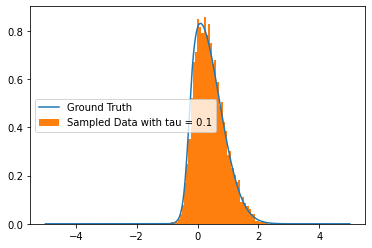

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 7197
iteration = 20000, number of accepted points = 14463
iteration = 30000, number of accepted points = 21696
iteration = 40000, number of accepted points = 28852
iteration = 50000, number of accepted points = 36027
iteration = 60000, number of accepted points = 43206
iteration = 70000, number of accepted points = 50489
iteration = 80000, number of accepted points = 57703
iteration = 90000, number of accepted points = 64782
iteration = 100000, number of accepted points = 72047
iteration = 110000, number of accepted points = 79291
iteration = 120000, number of accepted points = 86508
iteration = 130000, number of accepted points = 93734
burn_in!!
iteration = 140000, number of accepted points = 101045
iteration = 150000, number of accepted points = 108287
iteration = 160000, number of accepted points = 115427
iteration = 170000, number of accepted points = 122679
iteration = 180000, number of acc

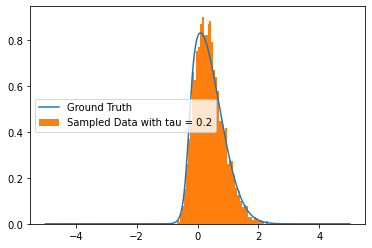

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 5905
iteration = 20000, number of accepted points = 11869
iteration = 30000, number of accepted points = 17854
iteration = 40000, number of accepted points = 23708
iteration = 50000, number of accepted points = 29671
iteration = 60000, number of accepted points = 35464
iteration = 70000, number of accepted points = 41343
iteration = 80000, number of accepted points = 47278
iteration = 90000, number of accepted points = 53277
iteration = 100000, number of accepted points = 59204
iteration = 110000, number of accepted points = 65064
iteration = 120000, number of accepted points = 70984
iteration = 130000, number of accepted points = 76982
iteration = 140000, number of accepted points = 82895
iteration = 150000, number of accepted points = 88857
iteration = 160000, number of accepted points = 94690
burn_in!!
iteration = 170000, number of accepted points = 100655
iteration = 180000, number of accept

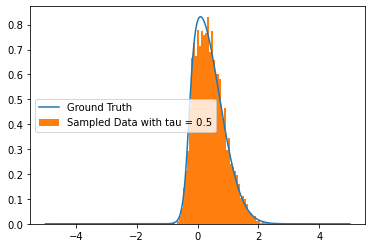

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 4849
iteration = 20000, number of accepted points = 9672
iteration = 30000, number of accepted points = 14524
iteration = 40000, number of accepted points = 19274
iteration = 50000, number of accepted points = 24087
iteration = 60000, number of accepted points = 28934
iteration = 70000, number of accepted points = 33852
iteration = 80000, number of accepted points = 38752
iteration = 90000, number of accepted points = 43659
iteration = 100000, number of accepted points = 48502
iteration = 110000, number of accepted points = 53293
iteration = 120000, number of accepted points = 58163
iteration = 130000, number of accepted points = 63000
iteration = 140000, number of accepted points = 67823
iteration = 150000, number of accepted points = 72587
iteration = 160000, number of accepted points = 77409
iteration = 170000, number of accepted points = 82293
iteration = 180000, number of accepted points = 

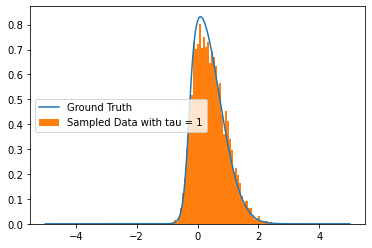

In [15]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(lp(x))
for tau in [0.01, 0.1, 0.2, 0.5, 1]:
    t = time.time()
    S, p = _rvs_(tau = tau)
    print(time.time()-t)
    rate.append(p)
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled Data with tau = {}".format(tau))
    plt.title('Metroplis-Hasting sampling with tau = {}'.format(tau))
    plt.grid(True)
    plt.legend()
    plt.show()

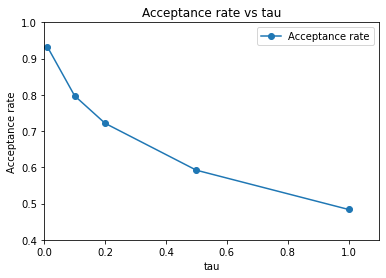

In [18]:
plt.plot([0.01, 0.1, 0.2, 0.5, 1], rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("tau")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs tau')
plt.xlim((0.0, 1.10))
plt.ylim((0.4, 1))
plt.grid(True)
plt.legend()
plt.show()

### (b) HMC

In [19]:
d = 1
mu = np.zeros(d)

In [20]:
M = np.eye(d)

In [21]:
K_ = lambda r, M: 0.5 * r.reshape(1, -1) @ np.linalg.inv(M) @ r.reshape(-1, 1)

In [22]:
K = lambda r: K_ (r, M)

In [34]:
U = lambda z : -lp(z)

In [35]:
dU = lambda z : 2*alpha*z - a *(1-sigma(z))

In [36]:
H = lambda z, r : U(z) + K(r)

In [37]:
def Leapfrog(eps, z, r, dU = dU):
    r_half = r - eps * dU(z)/2
    z_new = z + eps * np.linalg.inv(M) @ r_half
    r_new = r_half - eps * dU(z_new)/2
    return z_new, r_new

In [38]:
def L_step_Leapfrog(z, r, eps, L = 10):
    r_ = r.copy()
    z_ = z.copy()
    for l in range(L):
        z_, r_ = Leapfrog(eps = eps, z = z_, r = r_)
    return z_ , r_

In [39]:
def HMC(z_0, r_pdf = Gaussian, L = 10, eps = 0.01, 
        n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    
    Sample_points = []
    iteration = 0
    c = 0
    sampled = 0
    z_new = z_0.copy()
    
    while sampled <= n_sample:
        iteration += 1
        r_0 = r_pdf(mu, M)
        z_new, r_new = L_step_Leapfrog(eps = eps, z = z_0, r = r_0)
        
        p = np.log(np.random.uniform())
        if p <= H(z_0, r_0) - H(z_new, -r_new):
            c += 1
            if iteration % 10000 == 0:
                print('Iteration is {}, number of accepted points is {}'.format(iteration, c))
                print('Acceptance rate up to now:', c/iteration)
            if c >= burn_in_after:
                if sampled % 10 == 0:
                    Sample_points.append(z_new)
                    z_0 = z_new.copy()
                sampled += 1
            else:
                z_0 = z_new.copy()
                    
    return np.array(Sample_points), c/iteration

In [40]:
eps_list = [0.005,0.01,0.1,0.2,0.5]

In [41]:
t = time.time()
S, p = HMC(z_0 = np.zeros(1))
print(time.time()-t)

195.11348223686218


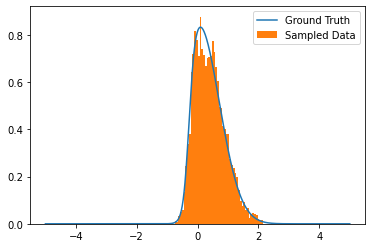

In [43]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(lp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled Data")
plt.legend()
plt.show()

Running time for eps = 201.64389204978943


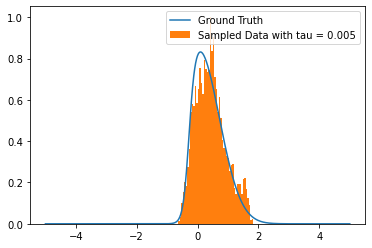

Running time for eps = 193.0509991645813


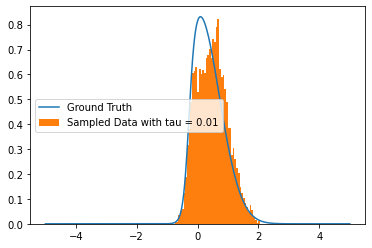

Running time for eps = 194.99446487426758


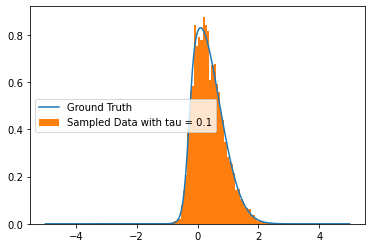

Running time for eps = 205.37357211112976


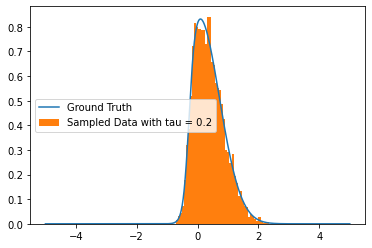

Running time for eps = 313.1682231426239


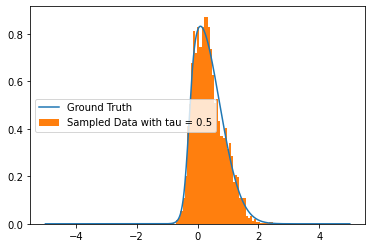

In [45]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(lp(x))
for eps in eps_list:
    t = time.time()
    S, p = HMC(z_0 = np.zeros(1), eps = eps)
    rate.append(p)
    print('Running time for eps = {} is '.format(eps, time.time()-t))
    
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled Data with eps = {}".format(eps))
    plt.title('Hybrid Monte-Carlo sampling with eps = {}'.format(eps))
    plt.grid(True)
    plt.legend()
    plt.show()

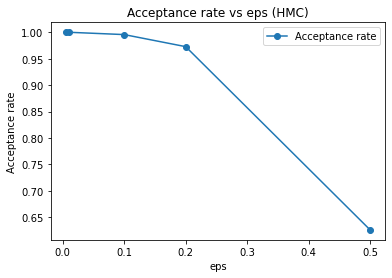

In [46]:
plt.plot(eps_list, rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("eps")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs eps (HMC)')
plt.grid(True)
#plt.xlim((0.0, 1.0))
#plt.ylim((0.0, 1.0))
plt.legend()
plt.show()